In [26]:

##########################################
# ALGORITHM  FOR CLOUD AND BIG DATA      #
# Authors: Carlos Bilbao, Álvaro Ortiz   #
##########################################

import pandas as pd
import numpy
import sklearn.metrics
#import significance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
#from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

############################
# 1 PREPARATION		       #
############################

ddbb_wars = pd.read_csv("result.csv", na_values='')
#print(ddbb_wars)

# Feature names
headers_wars = list(ddbb_wars)

############################
# 2 DATA EXPLORATION       #
############################

# Column names
print("Wars Features:")
print(headers_wars,'\n')
print("Columns in Wars = ", len(headers_wars))

# Unique elements of column Country
countries = set(ddbb_wars["country"])
print("Unique elems in column Country for wars = ", countries)

############################
# 3 PREPROCESSING          #
############################

# Feature matrix
x = []

# Label Array
y = []

le = preprocessing.LabelEncoder()
le = le.fit(ddbb_wars['country'].unique())

# We prepare the matrix with the data
for index, row in ddbb_wars.iterrows():

	vector = [le.transform([row['country']])[0],
			  #row['year'],
			  #le2.transform(row['allies'])[0],
			  #row['borderCountries'], # MISMO PROBLEMA QUE ALLIES
			  row['inversion'],
			  row['gdp']]
	x.append(vector)
	y.append(row['war'])

x = numpy.asarray(x)


Wars Features:
['country', 'year', 'allies', 'borderCountries', 'inversion', 'gdp', 'war'] 

Columns in Wars =  7
Unique elems in column Country for wars =  {'CMR', 'TUV', 'IDN', 'PAK', 'KGZ', 'HAN', 'BIH', 'MCO', 'AGO', 'RUS', 'ZWE', 'SYC', 'LBR', 'KNA', 'TKM', 'CIV', 'VNM', 'OMN', 'MAR', 'SLB', 'MLI', 'GMB', 'JPN', 'BGR', 'SUN', 'PSE', 'ALB', 'CHN', 'GRC', 'TGO', 'ARM', 'PER', 'CUB', 'GAB', 'OWID_AUH', 'TJK', 'MLT', 'HUN', 'BDI', 'AZE', 'LTU', 'TCD', 'SYR', 'MEX', 'GHA', 'COD', 'SVK', 'HTI', 'EGY', 'NIC', 'COG', 'YPR', 'TTO', 'USA', 'ROU', 'ISR', 'MWI', 'BAV', 'YEM', 'KAZ', 'SMR', 'LAO', 'LCA', 'CSK', 'MDV', 'KHM', 'LVA', 'POL', 'HSG', 'IND', 'BEL', 'BRN', 'HSE', 'MRT', 'MNG', 'CHL', 'URY', 'AUT', 'MKD', 'GTM', 'DZA', 'NZL', 'GBR', 'OWID_GFR', 'YUG', 'UKR', 'DNK', 'TON', 'BAD', 'DEU', 'SSD', 'PMA', 'CPV', 'PLW', 'GRD', 'MNE', 'LIE', 'IRL', 'UZB', 'GIB', 'MYS', 'AUH', 'VUT', 'YAR', 'TWN', 'ISL', 'BLR', 'CZE', 'CUW', 'MUS', 'HKG', 'SAU', 'MMR', 'WSM', 'BLZ', 'FJI', 'IRQ', 'NER', 'VEN',

In [31]:

############################
# 4 CLASSIFICATION         #
############################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# (1) Create the model
# Possible future work -> Find optimal parameters for here 
#SGDclf = SGDClassifier()
SVCclf = LinearSVC(max_iter=10000)

# (2) Fit the model
SVCclf.fit(x_train, y_train)

# (3) Predict
y_pred = SVCclf.predict(x_test)
print(y_pred)







#SGDy_pred = SGDclf.predict(x_test)
#print(SGDy_pred)

# Prints most important features for SGD
# sort the features by feature weight and show the first 10 (for news)
#top_feats_n = numpy.argsort(SGDclf.coef_[0])[-10:]

# Creates column for signifance test (p-value)
# significance.columns('bagging_column', SGDy_pred,y_test)

# (4) Report results
#print("SGD REPORT:")
#print(classification_report(y_test, SGDy_pred))
print("")
print("SVC REPORT:")
print(classification_report(y_test, y_pred))

# Possible future work -> McNemar Significance Test (alternative to R)
# Un segundo modelo igual para testearlo aqui con p-value!! Queda bien en reportes.
# tb = mcnemar_table(y_target=numpy.array(y_test), y_model1=SGDy_pred, y_model2=MNBy_pred)
# Test using McNemar
#chi2, p = mcnemar(ary=tb, exact=True)
#print('chi-squared:', chi2)
#print('p-value:', p)
#alpha = 0.5
#if p > alpha:
#print("No significant difference!")


[1 1 0 ... 1 1 0]

SVC REPORT:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2184
           1       1.00      0.94      0.97      2465

    accuracy                           0.97      4649
   macro avg       0.97      0.97      0.97      4649
weighted avg       0.97      0.97      0.97      4649



E:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


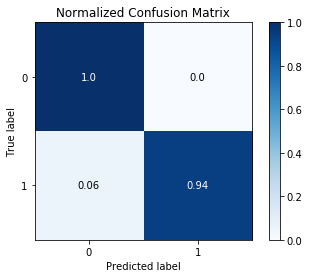

In [32]:
#Need to -> pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

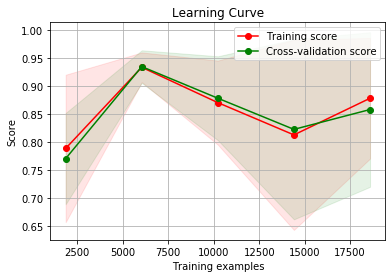

In [30]:
skplt.estimators.plot_learning_curve(LinearSVC(max_iter=1000), x, y, cv = 5, n_jobs = 10)

In [29]:
skplt.metrics.average_precision_score(y_test, y_pred)

0.9176696595965805

In [33]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets



n_features = x.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': SVCclf
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(x, y)

    y_pred = classifier.predict(x)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

Accuracy (train) for L1 logistic: 78.0% 


E:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

<Figure size 432x144 with 0 Axes>